<a href="https://colab.research.google.com/github/ElTejoman/Basic-Proyects---Cibertec/blob/main/Regresion_Lineal_an_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando librerias

In [ ]:
install.packages("missForest")
install.packages("doParallel")
install.packages("gtsummary")
install.packages("VIM")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rngtools’, ‘randomForest’, ‘foreach’, ‘itertools’, ‘iterators’, ‘doRNG’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(gtsummary)
library(tidyverse)
library(VIM)
library(ggplot2)
library(doParallel)
library(missForest)

In [ ]:
df <- read.csv("https://raw.githubusercontent.com/acosta187/datos/main/marketing.csv")
head(df)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


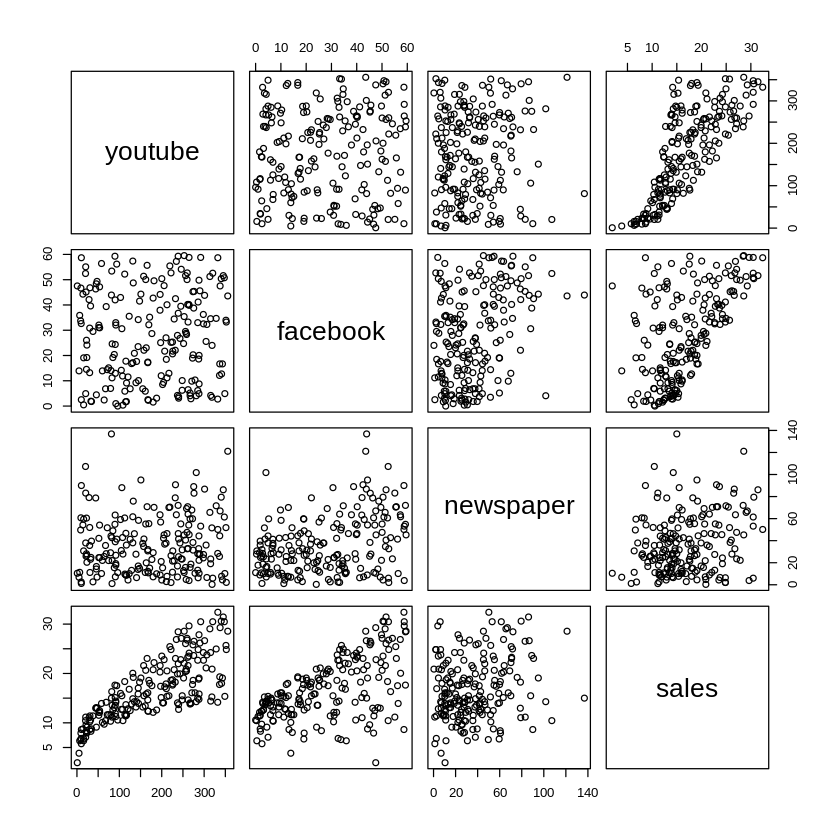

In [ ]:
plot(df)

In [ ]:
df2 <- read.csv("https://raw.githubusercontent.com/acosta187/datos/main/consumo_combustible.csv")
head(df2)

,y,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,18.90,350,165,8.00,2.56,4,3,200.3,69.9,3910,1
2,17.00,350,170,8.50,2.56,4,3,199.6,72.9,3860,1
3,20.00,250,105,8.25,2.73,1,3,196.7,72.2,3510,1
4,18.25,351,143,8.00,3.00,2,3,199.9,74.0,3890,1
5,20.07,225,95,8.40,2.76,1,3,194.1,71.8,3365,0
6,11.20,440,215,8.20,2.88,4,3,184.5,69.0,4215,1


In [ ]:
df2$x11 <- factor(df2$x11)

In [ ]:
full_model <- lm(y~.,data=df2)

In [ ]:
# Modelo óptimo
library(MASS)  # Para poder usar la funcion stepAIC
modback <- stepAIC(full_model, trace=TRUE, direction="backward")
summary(modback)

Start:  AIC=82.05
y ~ x1 + x2 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11

       Df Sum of Sq    RSS    AIC
- x6    1     0.146 209.16 80.076
- x11   1     0.168 209.18 80.079
- x2    1     0.606 209.62 80.146
- x1    1     2.646 211.66 80.456
- x7    1     4.975 213.99 80.806
- x4    1     6.073 215.09 80.970
- x9    1     7.764 216.78 81.221
<none>              209.02 82.054
- x5    1    19.988 229.00 82.976
- x10   1    28.091 237.11 84.089
- x8    1    42.576 251.59 85.986

Step:  AIC=80.08
y ~ x1 + x2 + x4 + x5 + x7 + x8 + x9 + x10 + x11

       Df Sum of Sq    RSS    AIC
- x11   1     0.215 209.38 78.109
- x2    1     0.460 209.62 78.146
- x1    1     3.515 212.68 78.609
- x7    1     4.854 214.02 78.810
- x4    1     5.993 215.16 78.980
- x9    1     7.666 216.83 79.228
<none>              209.16 80.076
- x5    1    21.374 230.54 81.189
- x10   1    30.250 239.41 82.398
- x8    1    42.946 252.11 84.052

Step:  AIC=78.11
y ~ x1 + x2 + x4 + x5 + x7 + x8 + x9 + x10

       Df Sum o


Call:
lm(formula = y ~ x5 + x8 + x10, data = df2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.512 -1.945 -0.631  1.931  6.003 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.010946  11.275042   0.444   0.6601    
x5           2.625031   1.202720   2.183   0.0376 *  
x8           0.211874   0.078850   2.687   0.0120 *  
x10         -0.009334   0.001702  -5.485 7.37e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.859 on 28 degrees of freedom
Multiple R-squared:  0.8151,	Adjusted R-squared:  0.7953 
F-statistic: 41.14 on 3 and 28 DF,  p-value: 2.156e-10


In [ ]:
df_tit <- read.csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
head(df_tit)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,3,male,22,1,0,7.2500,S,Third,man,True,,Southampton,no,False
2,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,3,female,26,0,0,7.9250,S,Third,woman,False,,Southampton,yes,True
4,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
5,0,3,male,35,0,0,8.0500,S,Third,man,True,,Southampton,no,True
6,0,3,male,NA,0,0,8.4583,Q,Third,man,True,,Queenstown,no,True
